In [27]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [5]:
print(f'Accuracy: {accuracy_score(y_test, y_hat)*100 : .3f}%')

Accuracy:  95.614%


In [6]:
# probs for 1 example
# y_hat =  model.predict(X_test[0].reshape(1,-1))
# y_test[0], y_hat

In [7]:
# probs =  model.predict_proba(X_test[0].reshape(1,-1))
# y_test[0], probs

In [8]:
# probs for the entire set
# probs = model.predict_proba(X_test)
# for i in range(len(probs)):
#     print(probs[i])

In [9]:
cm = confusion_matrix(y_test, y_hat)

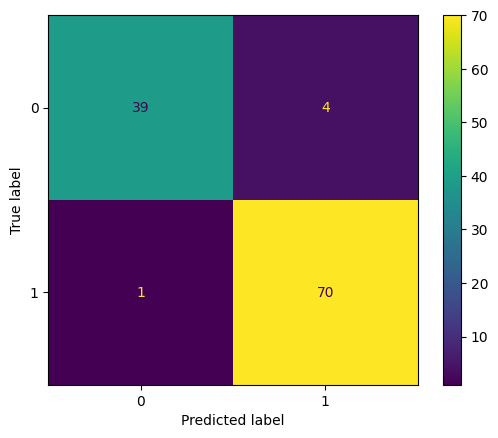

In [11]:
# do not use plot_confusion_matrix -- old

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [13]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
wines = load_wine()

In [25]:
X = wines.data
y = wines.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
preds = model.predict(X_test)

In [31]:
np.unique(wines.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [32]:
cm = confusion_matrix(y_test, preds)

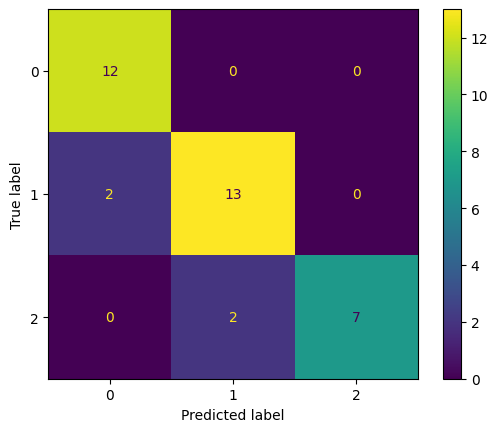

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.87      0.87      0.87        15
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



0.8571428571428571

In [39]:
model.feature_importances_

array([0.00491202, 0.01601745, 0.        , 0.        , 0.        ,
       0.        , 0.40980994, 0.        , 0.        , 0.15754263,
       0.03050942, 0.        , 0.38120854])

In [40]:
for n, importance in sorted(zip(wines.feature_names, model.feature_importances_), key= lambda x: x[1], reverse=True):
    print(f'Feature: {n:30s} | Importance: {importance:.2f}')

Feature: flavanoids                     | Importance: 0.41
Feature: proline                        | Importance: 0.38
Feature: color_intensity                | Importance: 0.16
Feature: hue                            | Importance: 0.03
Feature: malic_acid                     | Importance: 0.02
Feature: alcohol                        | Importance: 0.00
Feature: ash                            | Importance: 0.00
Feature: alcalinity_of_ash              | Importance: 0.00
Feature: magnesium                      | Importance: 0.00
Feature: total_phenols                  | Importance: 0.00
Feature: nonflavanoid_phenols           | Importance: 0.00
Feature: proanthocyanins                | Importance: 0.00
Feature: od280/od315_of_diluted_wines   | Importance: 0.00
